<a href="https://colab.research.google.com/github/Ashi743/ML-practices/blob/gradient-boosting-and-descent/descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

In [2]:
breast_cancer= load_diabetes()
breast_cancer.keys()


dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [3]:
df= pd.DataFrame(breast_cancer.data,
                 columns= breast_cancer.feature_names)
df['target'] = breast_cancer.target

In [4]:
x,y= load_diabetes(return_X_y=True, as_frame=False, scaled=False)

In [5]:
ff= load_diabetes(scaled= True)

In [6]:
gg=pd.DataFrame(ff.data, columns= ff.feature_names)
gg.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [7]:
x,y= load_diabetes(return_X_y=True, as_frame=True, scaled=True)

In [8]:
df.shape


(442, 11)

In [9]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [10]:
from scipy import stats
# Z-Score Method
z_scores = np.abs(stats.zscore(gg))
threshold = 3
outliers = np.where(z_scores > threshold)
print("Outliers found at positions (Z-Score):", outliers)

Outliers found at positions (Z-Score): (array([ 58, 123, 123, 123, 216, 230, 230, 256, 260, 261, 269, 322, 336,
       367, 441]), array([6, 4, 5, 7, 7, 4, 5, 2, 6, 6, 6, 7, 7, 2, 6]))


In [11]:
df["age"].max()

0.11072667545381144

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(x_train, y_train)


LinearRegression()

In [14]:
print(reg.coef_, reg.intercept_)

[  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743] 151.34560453985995


In [15]:
class gdregressor:
  def __init__(self,learning_rate,epochs):
    self.learning_rate= learning_rate
    self.epochs= epochs

  def fit(self,x,y):
    self.intercept_= 0
    self.coef_= np.ones(x.shape[1])  #columns
    for i in range(self.epochs):
      #mean square error
      y_hat= np.dot(x, self.coef_) +self.intercept_ #m.x+b
      #print(y_hat.shape)

      slope_der= -2*np.dot((y-y_hat), x) /x.shape[0]
      intercept_der= -2*np.mean(y-y_hat)


      self.coef_= self.coef_ - self.learning_rate*slope_der
      self.intercept_= self.intercept_ - self.learning_rate*intercept_der

    print(self.coef_, self.intercept_)

  def predict(self,x_test):
    return np.dot(x_test, self.coef_) + self.intercept_

In [16]:
np.ones(x.shape[1]).shape

(10,)

In [17]:
gd = gdregressor(learning_rate=0.01, epochs=100)
gd.fit(x_train, y_train)
y_pred = gd.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

[ 2.58205928  1.05941313  5.63996061  4.47530943  2.36970916  2.00365406
 -1.91538249  4.16500594  5.22508091  4.14890553] 133.32702206394623


-0.012302980688254417

In [18]:
x_train.iloc[:, 0].shape

(353,)

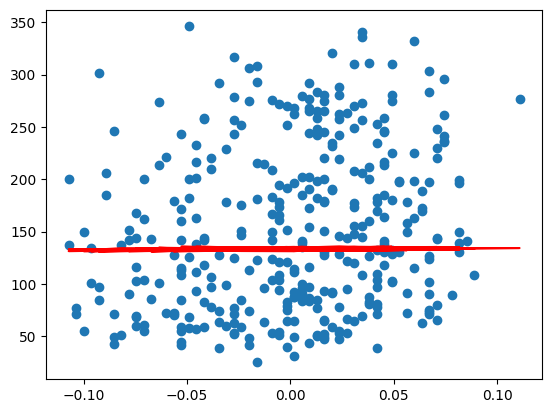

In [19]:
plt.scatter(x_train.iloc[:,0], y_train)
plt.plot(x_train.iloc[:,0], gd.predict(x_train), color='red')
plt.show()

In [20]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=10, eta0=0.1)
sgd_reg.fit(x_train, y_train)
print(sgd_reg.coef_)
sgd_reg.intercept_


[ 29.75062052  -5.22920996 113.78374944  83.37749805  29.23970693
  19.89028316 -69.05961344  73.04767412 101.83565332  67.41267923]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([151.30341828])

Mini batch gd

In [38]:
import random
class mbgd(BaseEstimator, RegressorMixin):
  def __init__(self, learning_rate, epochs, batch_size):
    self.learning_rate= learning_rate
    self.epochs= epochs
    self.batch_size= batch_size
    self.coef_= None
    self.intercept_= None


  def fit(self, x, y):
    self.intercept_= 0
    self.coef_= np.ones(x.shape[1])

    for i in range(self.epochs):
      for j in range(int(x.shape[0]/self.batch_size)):
        idx= random.sample(range(x.shape[0]), self.batch_size)
        x_batch= x.iloc[idx]
        y_batch= y.iloc[idx]
        y_hat= np.dot(x_batch, self.coef_) + self.intercept_

        slope_der= -2*np.dot((y_batch-y_hat), x_batch) /x_batch.shape[0]
        intercept_der= -2*np.mean(y_batch-y_hat)

        self.coef_= self.coef_ - self.learning_rate*slope_der
        self.intercept_= self.intercept_ - self.learning_rate*intercept_der

    print(self.coef_, self.intercept_)
    return self.coef_, self.intercept_

  def predict(self, x_test):
    return np.dot(x_test, self.coef_) + self.intercept_

  def score(self, x_test, y_test):
    y_pred= self.predict(x_test)
    return r2_score(y_test, y_pred)

In [39]:
mgd = mbgd(learning_rate=0.01, epochs=10, batch_size=10)
mgd.fit(x_train, y_train)
y_pred = mgd.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

[ 5.32390927  0.50903833 16.78803356 12.18282448  5.07956496  3.9884044
 -8.25733728 10.89020384 14.36242392 11.40912623] 150.38821917587765


0.04425357357770521

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1],
    'epochs': [10, 100, 150],
    'batch_size': [10, 35]
            }

# Create GridSearchCV
grid = GridSearchCV(estimator=mgd, param_grid=param_grid, cv=3)

# Fit the mode
grid.fit(x_train, y_train).best_params_

[ 3.2079388   1.72253396 12.29059011  8.33951741  3.68946614  3.30276516
 -5.00496237  7.3926994   8.98943768  7.83640435] 151.03357533243954
[ 3.84131817  0.99769782 10.95464743  9.29447692  3.82947352  2.50064363
 -5.02404872  7.53985624 11.018797    7.88071027] 150.76297281125863
[ 4.93098145  0.84184872 10.92034613  8.26157176  3.94059607  3.38760185
 -6.07794461  8.56209319 10.44890094  7.67266435] 158.94741474750944
[ 14.50946257   4.15648578  98.54240373  69.59724177  29.35301317
  21.47763181 -49.37981948  57.93727451  77.12544651  55.81744331] 146.0478535251853
[ 25.66115492  -5.51021273  86.31544598  71.47636794  19.26088652
   9.27561519 -51.21800106  52.83247841  85.12892108  53.07410991] 150.43904214546833
[ 37.3768975   -8.33439009  91.34382887  65.67147854  27.50350487
  18.71935991 -53.64336608  63.34186519  86.67585937  64.57069814] 158.22825227396007
[ 19.26160925   1.41625533  92.30694861  67.52820631  22.87546511
  18.34349617 -54.01942703  57.36955981  73.40184745 

In [34]:
import numpy as np
import pandas as pd
import random
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, RegressorMixin

class mbgd(BaseEstimator, RegressorMixin):
    def __init__(self, learning_rate=0.01, epochs=10, batch_size=32):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.coef_ = None
        self.intercept_ = None

    def fit(self, x, y):
        self.intercept_ = 0
        self.coef_ = np.ones(x.shape[1])

        for i in range(self.epochs):
            for j in range(int(x.shape[0] / self.batch_size)):
                idx = random.sample(range(x.shape[0]), self.batch_size)
                x_batch = x.iloc[idx]
                y_batch = y.iloc[idx]
                y_hat = np.dot(x_batch, self.coef_) + self.intercept_

                slope_der = -2 * np.dot((y_batch - y_hat), x_batch) / x_batch.shape[0]
                intercept_der = -2 * np.mean(y_batch - y_hat)

                self.coef_ = self.coef_ - self.learning_rate * slope_der
                self.intercept_ = self.intercept_ - self.learning_rate * intercept_der

        return self

    def predict(self, x_test):
        return np.dot(x_test, self.coef_) + self.intercept_

    def score(self, x_test, y_test):
        y_pred = self.predict(x_test)
        return r2_score(y_test, y_pred)


# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1],
    'epochs': [10, 100],
    'batch_size': [10, 35]
}

# Create GridSearchCV
grid = GridSearchCV(estimator=mbgd(), param_grid=param_grid, cv=3)

# Fit the model
grid_result = grid.fit(x_train, y_train)
grid_result.best_params_



{'batch_size': 10, 'epochs': 100, 'learning_rate': 0.1}

In [ ]:

# Print the results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
for mean, stdev, param in zip(grid_result.cv_results_['mean_test_score'], grid_result.cv_results_['std_test_score'], grid_result.cv_results_['params']):
    print(f"Mean: {mean:.4f}, Std Dev: {stdev:.4f} with: {param}")

In [ ]:
sgd = SGDRegressor(learning_rate='constant',eta0=0.1)

In [ ]:
batch_size = 35

for i in range(100):

    idx = random.sample(range(x_train.shape[0]),batch_size)
    sgd.partial_fit(x_train.iloc[idx],y_train.iloc[idx])

In [ ]:
sgd.coef_
sgd.intercept_